In [1]:
using Pkg
Pkg.instantiate()

Precompiling project...
  ✓ QARBoM
  1 dependency successfully precompiled in 2 seconds. 266 already precompiled.


In [2]:
using Revise

In [3]:
using QARBoM, MLDatasets, ImageShow, DataFrames, CSV

In [4]:
using Images

In [5]:
trainset = MNIST(:train)

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :train
  features  =>    28×28×60000 Array{Float32, 3}
  targets   =>    60000-element Vector{Int64}

In [6]:
x_train, y_train = trainset[:]

(features = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [5, 0, 4, 1, 9, 2, 1, 3, 1, 4  …  9, 2, 9, 5, 1, 8, 3, 5, 6, 8])

In [7]:
x_bin = [
    vec(round.(Int, x_train[:,:,i])) for i in 1:60000
    ]

60000-element Vector{Vector{Int64}}:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 

In [10]:
rbm = QARBoM.RBM(28*28,500)

QARBoM.RBM([-1.6145259254618949 0.21431296342421818 … 1.0964254998812242 -0.6290394199029522; -1.5128446047361461 0.6330325217336091 … 0.8935397167108804 -0.3447916902283355; … ; 0.14418333002069725 -1.0119674367232439 … 0.1747156502942673 -0.4808105715383365; 0.16592378288303225 1.379817736546524 … -1.6350792940492298 -1.4136756316478716], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 784, 500)

In [11]:
avg_loss = QARBoM.train_pcd(rbm, x_bin[1:5000]; batch_size = 10, n_epochs = 50, learning_rate = 0.1)

Setting mini-batches
Starting training
|------------------------------------------------------------------------------|
| Epoch | Avg. Loss | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|     1 |   36.7693 |       12.3026 |      21.7050 |       19.6178 |   53.6254 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch | Avg. Loss | Time (Sample) | Time (Gibbs) | Time (Update) | Total     |
|------------------------------------------------------------------------------|
|     2 |   30.1477 |       11.6504 |      21.1864 |       18.3086 |  104.7709 |
|------------------------------------------------------------------------------|
|------------------------------------------------------------------------------|
| Epoch | Avg. Loss | Time (Sample) | Time (Gibbs) | Time (Update) | T

50-element Vector{Float64}:
 36.76925076496087
 30.147655429594302
 28.162243241445296
 27.29395100953894
 26.344378129973617
 25.655868759300464
 25.29090672232685
 24.600869398109243
 24.134461736636283
 23.836336732952667
 23.4503752596551
 23.489004170458365
 23.181578951032684
  ⋮
 20.364421505425252
 20.101106099882937
 20.36968718478717
 20.204795331527837
 20.02806209327745
 20.203002380057875
 20.037474332746328
 19.967104959780926
 20.03489864623086
 20.072809402980575
 19.682022081621664
 19.86649455441087

In [12]:
df = DataFrame("epoch" => 1:50, "avg_loss" => avg_loss)

Row,epoch,avg_loss
,Int64,Float64
1,1,36.7693
2,2,30.1477
3,3,28.1622
4,4,27.294
5,5,26.3444
6,6,25.6559
7,7,25.2909
8,8,24.6009
9,9,24.1345


In [15]:
CSV.write("pcd_avg_loss.csv", df)

"pcd_avg_loss.csv"

In [16]:
testset = MNIST(:test)
x_test, y_test = testset[:]

(features = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], targets = [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [17]:
x_test = [
    vec( x_test[:,:,i]) for i in 1:10000
    ]

10000-element Vector{Vector{Float32}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0,

In [18]:
x_bin_test = [
    vec(round.(Int, x_test[i])) for i in 1:10000
    ]

10000-element Vector{Vector{Int64}}:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 

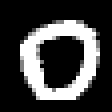

In [36]:
original_vec = x_test[5000]
original_img = 1.0 .* reshape(original_vec, (28,28))
colorview(Gray, original_img)

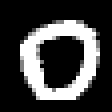

In [37]:
cut = 784
corrupted_vec = vcat(original_vec[1:cut], zeros(784-cut))
corrupted_img = 1.0 .* reshape(corrupted_vec, (28,28))
colorview(Gray, corrupted_img)

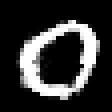

┌ Error: Error watching manifest
│   exception =
│    SystemError: opening file "/Users/pripper/.julia/packages/ArrayInterface/dX1NB/src/ArrayInterface.jl__@require__": No such file or directory
│    Stacktrace:
│     [1] systemerror(p::String, errno::Int32; extrainfo::Nothing)
│       @ Base ./error.jl:176
│     [2] #systemerror#80
│       @ ./error.jl:175 [inlined]
│     [3] systemerror
│       @ ./error.jl:175 [inlined]
│     [4] open(fname::String; lock::Bool, read::Nothing, write::Nothing, create::Nothing, truncate::Nothing, append::Nothing)
│       @ Base ./iostream.jl:293
│     [5] open
│       @ ./iostream.jl:275 [inlined]
│     [6] open(f::Base.var"#387#388"{String}, args::String; kwargs::Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}})
│       @ Base ./io.jl:382
│     [7] open
│       @ ./io.jl:381 [inlined]
│     [8] read
│       @ ./io.jl:462 [inlined]
│     [9] (::Revise.var"#41#42"{String})()
│       @ Revise ~/.julia/packages/Revise/bAgL0/src/pkgs.jl:466
└ 

In [39]:
reconstructed = QARBoM.reconstruct(rbm, round.(Int,original_vec))
reconstructed_img = 1.0 .* reshape(reconstructed, (28,28))
colorview(Gray, reconstructed_img)

In [64]:
rbm

QARBoM.RBM([-0.644878712730383 -2.0314517600597233 … -0.20789780140624423 1.0923774931552528; -0.374016904115657 0.298548978314043 … -0.7131984152543572 0.6063948330716113; … ; 0.2328611913516183 -0.5269877213921075 … 0.6899755861383681 0.6781252668528139; -1.1627185531091604 -2.2311703227376003 … 0.8564072945366772 -0.12338231697073355], [-1.2068438954294858, -1.034493266065522, -1.014668038371026, -0.6004519364459995, -0.7518556884925321, -1.0402962160987652, -0.9270410746300998, -0.9208301774588163, -0.7041272633184081, -1.0071111654037874  …  -0.6545743787129513, -0.7228061521527742, -1.0489855863672035, -0.9239041060991984, -0.8612390577063783, -1.1620978668542135, -0.9083072270101563, -0.9234904955333247, -1.1993394714943029, -0.6798883248083794], [0.10593815027436804, 2.1496756027850936, 0.06604463896709066, 9.99541427737482, -0.8064975225797423, -1.8678375044072069, 1.2178459541336937, -3.2279189160743593, -0.07123318857023057, -0.10711503466565321  …  -0.005808030496380461, 0.

In [31]:
length(5:111)

107